In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('C:/Users/Jibin Im/Downloads/heart.csv')

data.head()
#looking at the head it seems that the data is already somewhat cleaned so it can be used through sci kit learn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [94]:
data.info()
#looking at the info, it seems there aren't any Na values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [95]:
#according to the discussion page on kaggle, it seems that there are some duplicate datas. So lets count how many there are
data.duplicated().sum()

723

In [101]:
#Since there are 723 duplicates which can allow bias to our model, lets remove them
data = data.drop_duplicates()

<Axes: xlabel='age', ylabel='Count'>

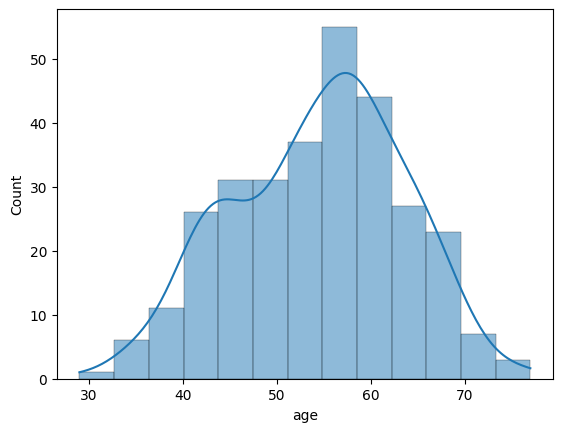

In [97]:
sns.histplot(data['age'],kde=True,linewidth = 0.2)
#looking at this histplot, we know that the majority of the people in the dataset will be around 60 years of age 

target
False    302
Name: count, dtype: int64


<Axes: xlabel='age', ylabel='Count'>

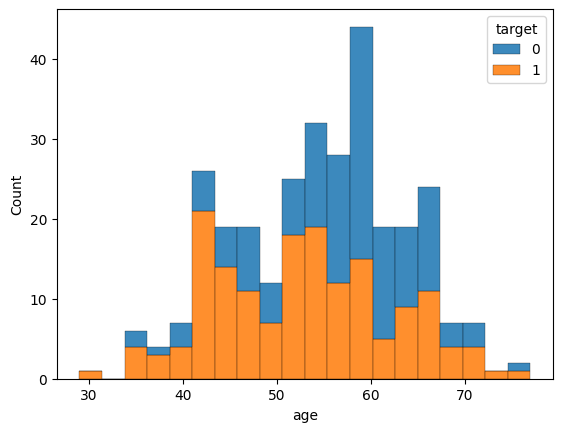

In [98]:
print((data['target']==2).value_counts())
#although in the description, it says thal: 0 = normal; 1 = fixed defect; 2 = reversable defect, there doesnt seem to be any 2s in the dataset

sns.histplot(data=data, x='age', hue='target', multiple='stack', bins=20, alpha=0.87, linewidth = 0.2)
#there seems to be more males with irreversible heart disease but no woman or men with reversible defect

In [113]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='target') # take out target column
y = data['target'] # leave only target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#split 1/3 into test and training

data.shape[0]

302

In [110]:
from sklearn.ensemble import VotingClassifier

#models i will be testing
from sklearn.linear_model import LogisticRegression#Acuracy: 0.7905604719764012 (max_iter =900)
from sklearn.neighbors import KNeighborsClassifier#Acuracy: 0.7050147492625368
from sklearn.tree import DecisionTreeClassifier#Acuracy: 0.9734513274336283

clf1 = LogisticRegression(max_iter=900)
clf2 = DecisionTreeClassifier()

clf3 = VotingClassifier(estimators=[('LR', clf1), ('DTC', clf2)],
                        voting='hard',
                        weights=[0.5, 5])#Acuracy: 0.9616519174041298

clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f"Acuracy: {accuracy}")
#seems that even with voting classifier, using only decisiontreeclassfier is better

Acuracy: 0.83


Now the code up top with the acuracy is false and the model was biasing when predicting due to there being a lot of duplicates in the data which messed with my results. Now if I check how many rows there are after deleting the duplicates, there seems to be only 302 left. This is not enough data to make a model and definately not enough to split with. Thius allowed me to understand that I need to take precautions before using data. I need to first analyze it before it is too late and I make a model based off of false data.